### This is the model to predict the house price using Regression Model and the california_housing dataset from sklearn

    * We will also visualize the possible data to have better uderstanding 
    * We will be using numpy, matplotlib, sklearn in this model building 
    

In [1]:
# Import all the libraries to build the model 

import numpy as np   # Numarical python - > creating arrays, modifyig data, mean, meadian, error, std
import matplotlib.pyplot as plt # scatter, 
from sklearn import datasets # dataset, models, useful function
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# Import California Housing dataset 
# Exploring the data
california_housing = datasets.fetch_california_housing() # Returns a dictionary
print(california_housing.keys())  # Returns all the keys
print(california_housing.data.shape)  # Returns the shape
print(california_housing.feature_names)
print(california_housing.target.shape)
 
# Modeling 

X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640,)


In [3]:
# Training the model 

model = LinearRegression()
model.fit(X_train, y_train)
print(f"coefficients/weights :{model.coef_}")
print("coefficients/weights :", model.coef_) # Weights
print(f"Intercepts/Bias :{model.intercept_}")
print("Intercepts/Bias : ",model.intercept_) # Bias

coefficients/weights :[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
coefficients/weights : [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
Intercepts/Bias :-37.02327770606359
Intercepts/Bias :  -37.02327770606359


In [4]:
# making a DataFrame 

import pandas as pd  #Excel in python
df = pd.DataFrame(model.coef_, california_housing.feature_names, columns = ['coeff'])
print(df)


               coeff
MedInc      0.448675
HouseAge    0.009724
AveRooms   -0.123323
AveBedrms   0.783145
Population -0.000002
AveOccup   -0.003526
Latitude   -0.419792
Longitude  -0.433708


[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ]
[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


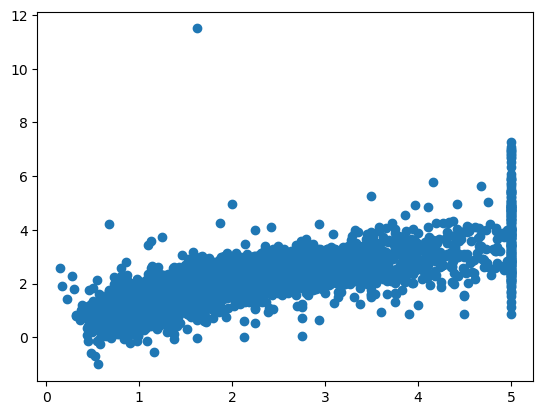

In [5]:
# Testing

y_pred = model.predict(X_test)
print(y_test)
print(y_pred)
plt.scatter(y_test, y_pred)

In [6]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [7]:

df_of_Actual_and_Pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
df_of_Actual_and_Pred

,y_test,y_pred
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657
...,...,...
4123,2.63300,1.991746
4124,2.66800,2.249839
4125,5.00001,4.468770
4126,0.72300,1.187511


#### There are 3 types of metrics for regression models 

    1. Mean Absolute Error (MAE)
    2. Mean Squared Error (MSE)
    3. Root Mean Squared Error (RMSE)
    

In [8]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"The Mean Absolute Error is : {mae}")
print(f"The Mean Squared Error is : {mse}")
print(f"The Root Mean Squared Error is : {rmse}")

The Mean Absolute Error is : 0.5332001304956976
The Mean Squared Error is : 0.5558915986952422
The Root Mean Squared Error is : 0.7455813830127749


#### Converting the data into DataFrame 


In [9]:
california_df = pd.DataFrame(data = california_housing.data, columns = california_housing.feature_names)
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [10]:
# Adding the y column to the above dataframe 
california_df['target']=california_housing.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### Now let's visualize the data using the seaborn 

/Users/mekalathuruchenchaiah/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


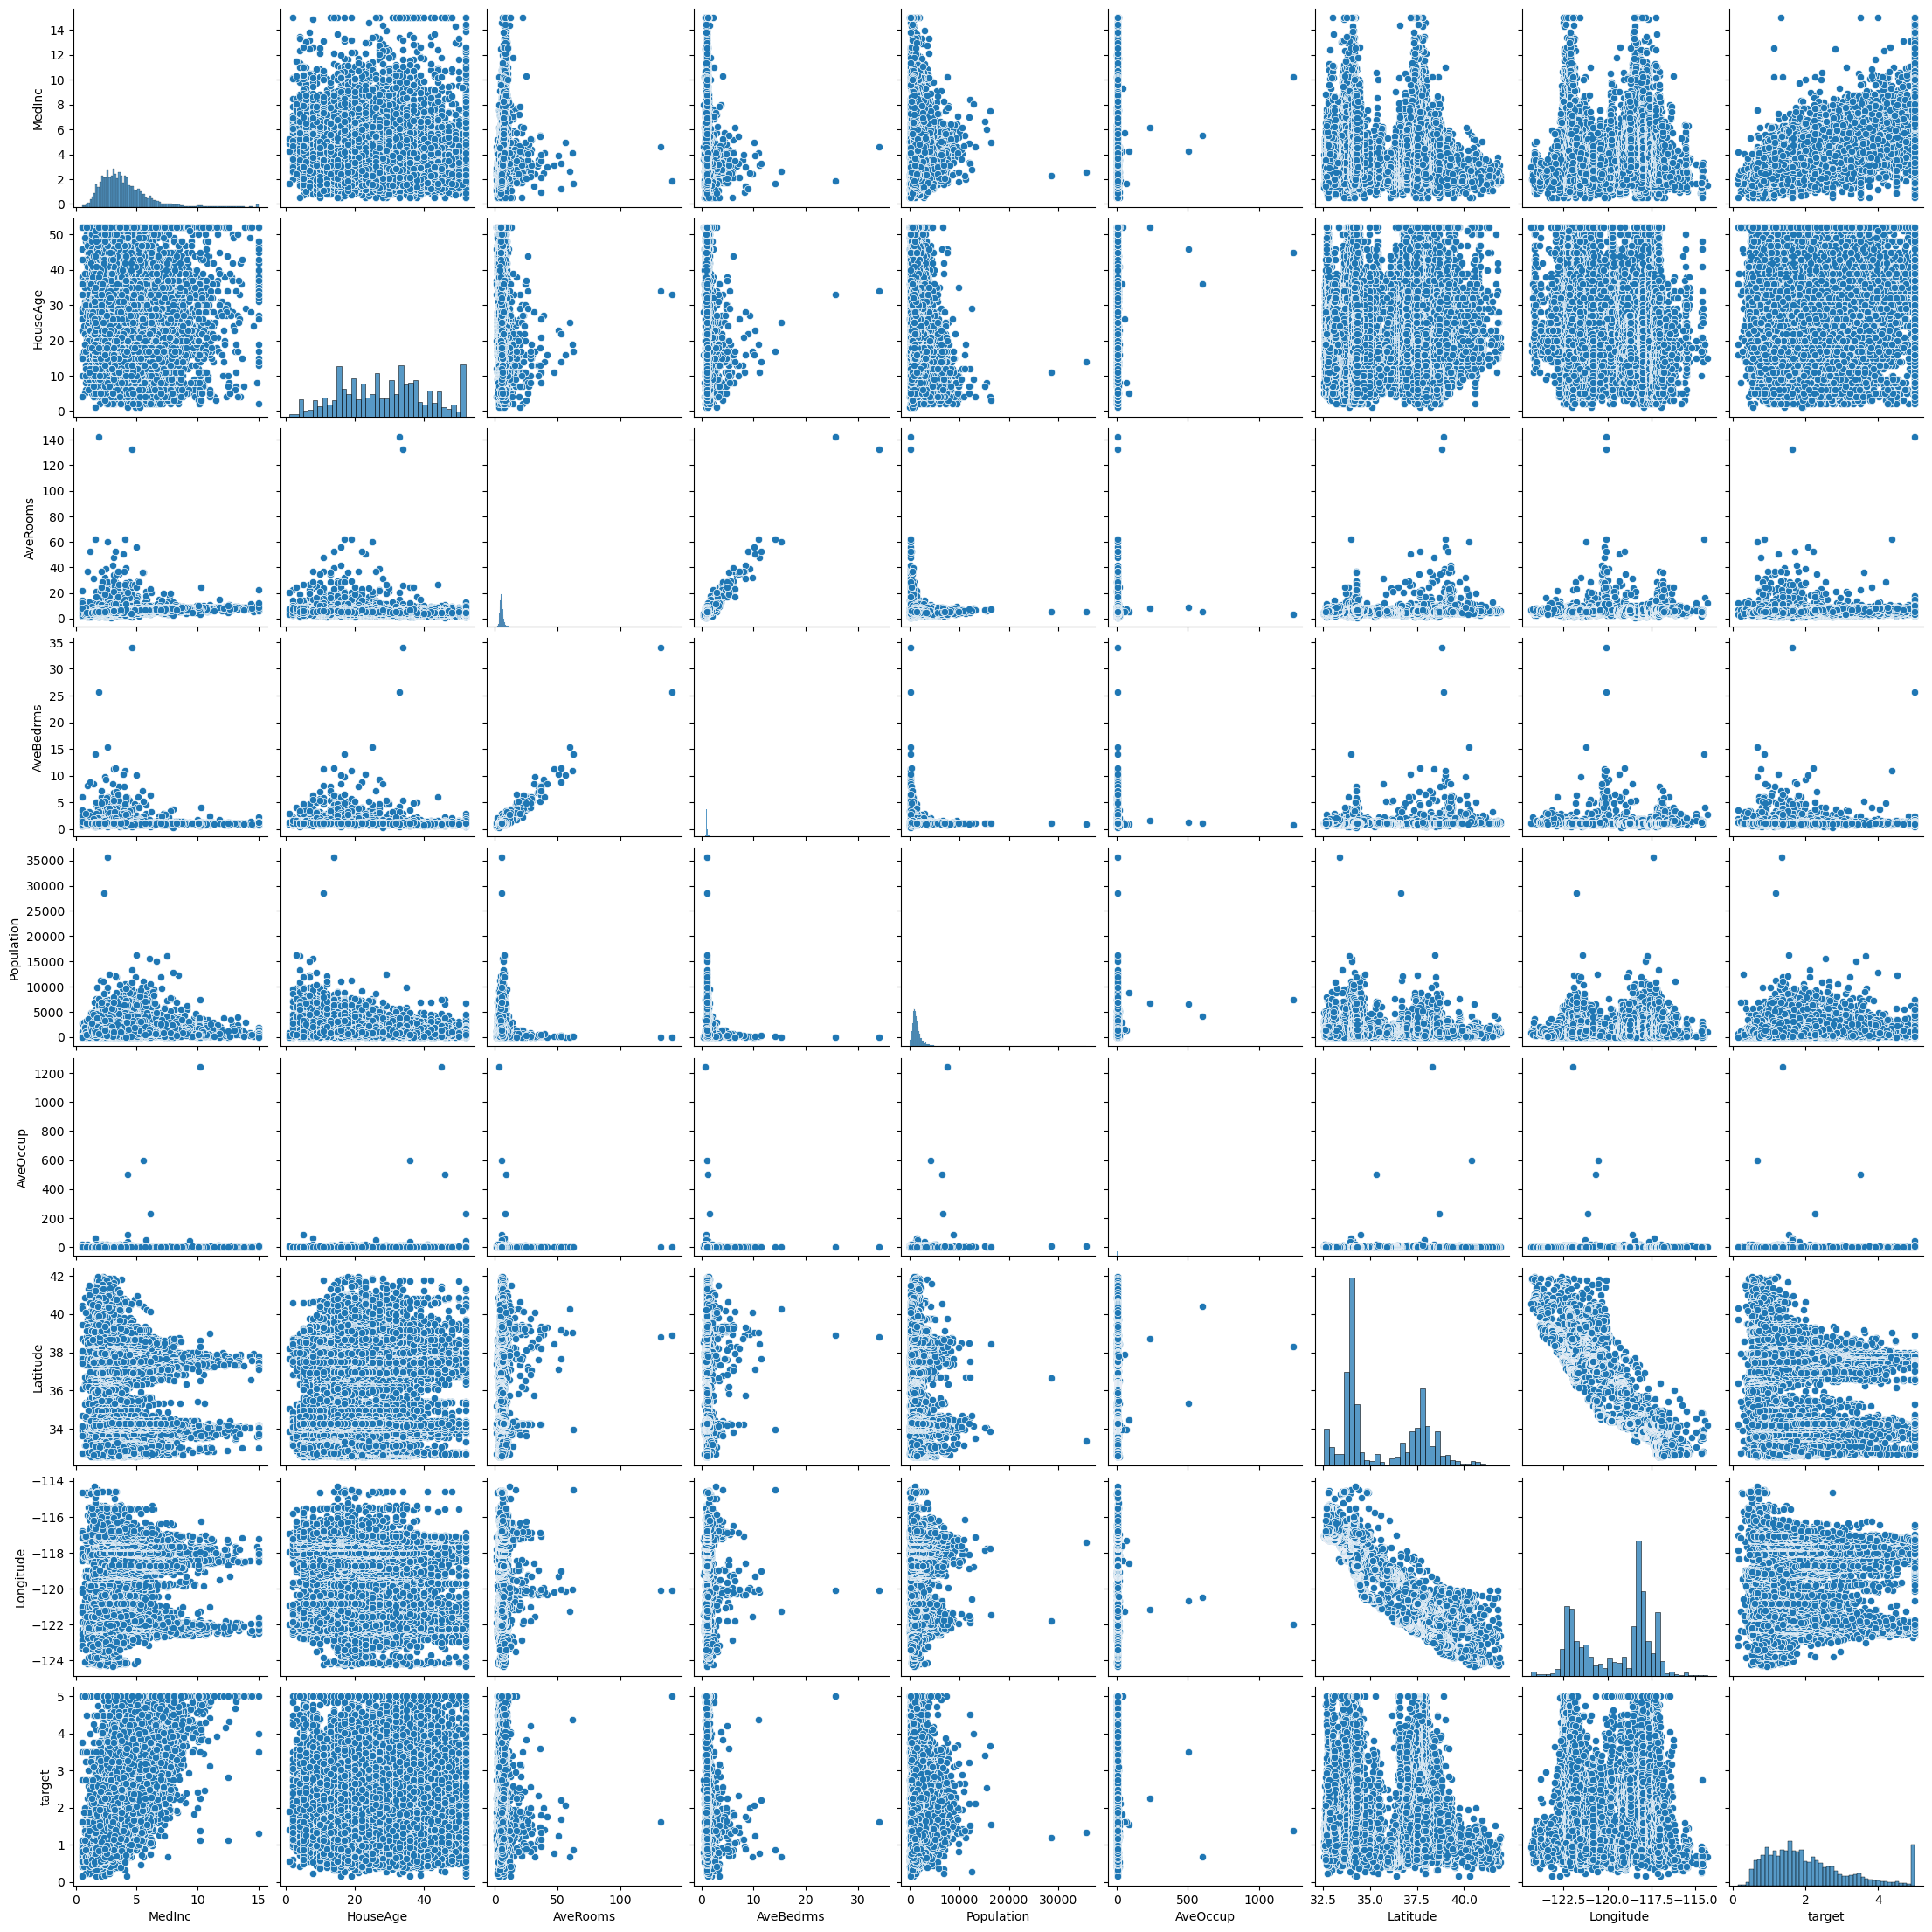

In [11]:
import seaborn as sns  #Matplotlib
sns.pairplot(california_df)
plt.show()

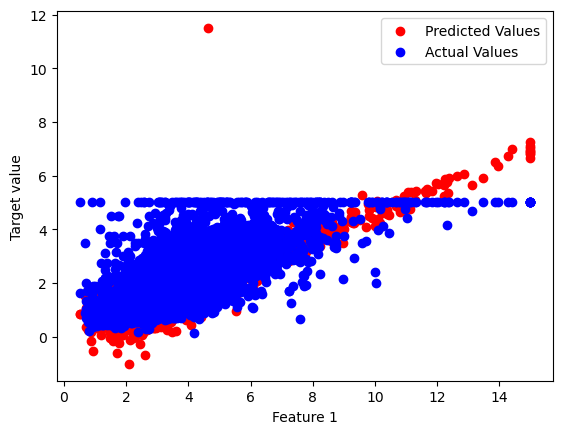

In [12]:
plt.scatter(X_test[:, 0], y_pred, color = 'red', label = 'Predicted Values')
plt.scatter(X_test[:, 0], y_test, color = 'blue', label = 'Actual Values')
plt.xlabel('Feature 1')
plt.ylabel('Target value')
plt.legend()
plt.show()

#### Let's try to plot in 3D now using the above data


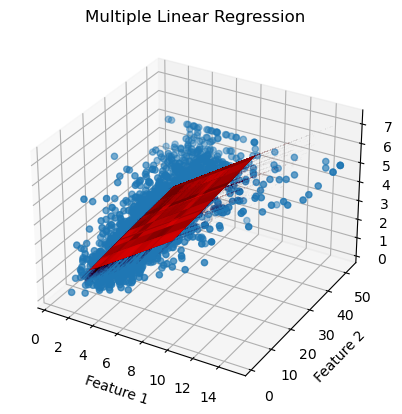

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X_test[:,0]
y = X_test[:,1]
z = y_test

ax.scatter(x, y, z)


A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0]*x_plane + plane_coef[1] * y_plane + plane_coef[2]

ax.plot_surface(x_plane, y_plane, z_plane, alpha = 0.5, color= 'red')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target Variable")
plt.title("Multiple Linear Regression")

plt.show()